In [1]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
from PIL import Image
from PIL import ImageEnhance
import random

In [4]:
def save_image(image,addr,num):
    address = addr + str(num)+ '.jpg'
    cv.imwrite(address,image)

In [2]:
np.__version__

'1.15.4'

# 视频转换为帧

In [6]:
video_root_path = 'D:\\UCB_ML\\gesture_dataset\\Gesture_DIY_Video_v2\\Gesture_DIY_Video_Calvin'   #不同的人的视频要改
frame_root_path = './gesture_dataset/Gesture_DIY_Dataset_v3'

In [10]:
for _,_,videos in os.walk(video_root_path):
    
    for video in videos:
        abs_path = video_root_path + '/' + video
        
        label = ((os.path.basename(abs_path)).split('.'))[0]
        
#         if label.upper() not in ['2']:
#             continue
        
        whosehand = os.path.basename(video_root_path).split('_')[-1]
        
        if not os.path.exists(frame_root_path + '/' + label):
            os.mkdir(frame_root_path + '/' + label)
        
        videoCapture = cv.VideoCapture(abs_path)
        success, frame = videoCapture.read()
        
        i = 0
        while success:
            i = i + 1
            
#             frame=cv.transpose(frame)
#             frame=cv.flip(frame,flipCode=1)    #顺时针旋转90度
            
            save_image(frame,frame_root_path + '/' + label + '/' + whosehand,i)
            if i == 400:
                break
            success, frame = videoCapture.read()
        
        print('Video {} has been converted to frames!'.format(video))
        

Video 0.mp4 has been converted to frames!
Video 1.mp4 has been converted to frames!
Video 10.mp4 has been converted to frames!
Video 2.mp4 has been converted to frames!
Video 3.mp4 has been converted to frames!
Video 4.mp4 has been converted to frames!
Video 5.mp4 has been converted to frames!
Video 6.mp4 has been converted to frames!
Video 7.mp4 has been converted to frames!
Video 8.mp4 has been converted to frames!
Video 9.mp4 has been converted to frames!
Video A.mp4 has been converted to frames!
Video B.mp4 has been converted to frames!
Video C.mp4 has been converted to frames!
Video D.mp4 has been converted to frames!
Video E.mp4 has been converted to frames!
Video F.mp4 has been converted to frames!
Video G.mp4 has been converted to frames!
Video H.mp4 has been converted to frames!
Video I.mp4 has been converted to frames!
Video J.mp4 has been converted to frames!
Video K.mp4 has been converted to frames!
Video L.mp4 has been converted to frames!
Video M.mp4 has been converted to

# 数据增强函数

In [87]:
def flip(root_path='',img_name='',image_data=None):   #翻转图像
    if image_data != None:
        img = image_data
    else:
        img = Image.open(os.path.join(root_path, img_name))
    flip_img = img.transpose(Image.FLIP_LEFT_RIGHT)
    # filp_img.save(os.path.join(root_path,img_name.split('.')[0] + '_flip.jpg'))
    return flip_img

def rotation(root_path='',img_name='',image_data=None):
    if image_data:
        img = image_data
    else:
        img = Image.open(os.path.join(root_path, img_name))
    rotation_img = img.rotate(20) #旋转角度
    # rotation_img.save(os.path.join(root_path,img_name.split('.')[0] + '_rotation.jpg'))
    return rotation_img

def randomColor(root_path='',img_name='',image_data=None): #随机颜色
    """
    对图像进行颜色抖动
    :param image: PIL的图像image
    :return: 有颜色色差的图像image
    """
    if image_data:
        image = image_data
    else:
        image = Image.open(os.path.join(root_path, img_name))
    random_factor = np.random.randint(0, 31) / 10.  # 随机因子
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
    random_factor = np.random.randint(10, 21) / 10.  # 随机因子
    brightness_image = ImageEnhance.Brightness(color_image).enhance(random_factor)  # 调整图像的亮度
    random_factor = np.random.randint(10, 21) / 10.  # 随机因子
    contrast_image = ImageEnhance.Contrast(brightness_image).enhance(random_factor)  # 调整图像对比度
    random_factor = np.random.randint(0, 31) / 10.  # 随机因子
    return ImageEnhance.Sharpness(contrast_image).enhance(random_factor)  # 调整图像锐度


def contrastEnhancement(root_path='',img_name='',image_data=None):  # 对比度增强
    if image_data:
        image = image_data
    else:
        image = Image.open(os.path.join(root_path, img_name))
    enh_con = ImageEnhance.Contrast(image)
    contrast = 1.5
    image_contrasted = enh_con.enhance(contrast)
    return image_contrasted

def brightnessEnhancement(root_path='',img_name='',image_data=None):#亮度增强
    if image_data:
        image = image_data
    else:
        image = Image.open(os.path.join(root_path, img_name))
    enh_bri = ImageEnhance.Brightness(image)
    brightness = 1.5
    image_brightened = enh_bri.enhance(brightness)
    return image_brightened

def colorEnhancement(root_path='',img_name='',image_data=None):#颜色增强
    if image_data:
        image = image_data
    else:
        image = Image.open(os.path.join(root_path, img_name))
    enh_col = ImageEnhance.Color(image)
    color = 1.5
    image_colored = enh_col.enhance(color)
    return image_colored

def gauss_noise(root_path='',img_name='',image_data=None, mean=0, var=0.001):

    '''

        添加高斯噪声

        mean : 均值

        var : 方差

    '''
    if image_data:
        image = image_data
    else:
        image = Image.open(os.path.join(root_path, img_name))
    image = np.array(image)/255.0
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    out = np.clip(out, 0, 1.0)
    out = np.uint8(out*255)
    out = Image.fromarray(out)
    return out

In [54]:
img_name = 'Jeremy27.jpg'
label = '0'
img_path = os.path.join(label,img_name)

#左右翻转
# new_img = flip(frame_root_path,img_path)
# new_img.show()

#随机颜色
# new_img = randomColor(frame_root_path,img_path)
# new_img.show()

#对比度增强
# new_img = contrastEnhancement(frame_root_path,img_path)
# new_img.show()

#亮度增强
# new_img = brightnessEnhancement(frame_root_path,img_path)
# new_img.show()

#颜色增强
# new_img = colorEnhancement(frame_root_path,img_path)
# new_img.show()

#高斯噪声
new_img = gauss_noise(frame_root_path,img_path)
new_img.show()

# 图片统一缩放 + 数据增强

In [108]:
frame_root_path = './gesture_dataset/Gesture_DIY_Dataset_v2'
frame_small_root_path = './gesture_dataset/Gesture_DIY_Dataset_v2_aug'
resize_height = 160
resize_width = 90

aug_funcs = ['randomColor','contrastEnhancement','brightnessEnhancement','colorEnhancement','gauss_noise','flip']
augfunc_map = {'flip':flip,
               'randomColor':randomColor,
               'contrastEnhancement':contrastEnhancement,
               'brightnessEnhancement':brightnessEnhancement,
               'colorEnhancement':colorEnhancement,
               'gauss_noise':gauss_noise}
label_name = ['0','1','2','3','4','5','6','7','8','9','10'
              ,'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
# label_check = ['0']

In [109]:
def image_process(label_name,frame_root_path,frame_small_root_path,need_aug=True,need_resize=True):
    is_root = True

    for label in label_name:
        root_path = frame_root_path + '/' + label

        for _,_,pics in os.walk(root_path):
            i = 0

            for pic in pics:
                i = i + 1
                abs_path = root_path + '/' + pic
                
                augmentations = []
                if need_aug:
                    #选择要不要做数据增强
                    if np.random.rand() <= 0.5:  #翻转
                        augmentations.append('flip')
                    if np.random.rand() <= 0.2:  #高斯噪声
                        augmentations.append('gauss_noise')
                    if np.random.rand() <= 0.2:  #颜色增强
                        index = np.random.choice(3)
                        augmentations.append(aug_funcs[index])

                #读取并resize图片
                label_img_path = os.path.join(label,pic)
                img_raw = Image.open(os.path.join(frame_root_path, label_img_path))
                
                if need_resize:
                    img_resize = img_raw.resize((resize_width,resize_height), Image.ANTIALIAS)
                else:
                    img_resize = img_raw

                #若非空，则进行数据增强
                if augmentations:
                    for augmentation in augmentations:
                        img_resize = augfunc_map[augmentation](image_data=img_resize)

                if not os.path.exists(frame_small_root_path + '/' + label):
                    os.mkdir(frame_small_root_path + '/' + label)

                save_path = os.path.join(frame_small_root_path,label_img_path)
                img_resize.save(save_path, quality = 95)

        print('All pictures of label {} is shrinked and augmented!!'.format(label))

In [110]:
image_process(label_name,frame_root_path,frame_small_root_path,need_resize=False)

All pictures of label 0 is shrinked and augmented!!
All pictures of label 1 is shrinked and augmented!!
All pictures of label 2 is shrinked and augmented!!
All pictures of label 3 is shrinked and augmented!!
All pictures of label 4 is shrinked and augmented!!
All pictures of label 5 is shrinked and augmented!!
All pictures of label 6 is shrinked and augmented!!
All pictures of label 7 is shrinked and augmented!!
All pictures of label 8 is shrinked and augmented!!
All pictures of label 9 is shrinked and augmented!!
All pictures of label 10 is shrinked and augmented!!
All pictures of label A is shrinked and augmented!!
All pictures of label B is shrinked and augmented!!
All pictures of label C is shrinked and augmented!!
All pictures of label D is shrinked and augmented!!
All pictures of label E is shrinked and augmented!!
All pictures of label F is shrinked and augmented!!
All pictures of label G is shrinked and augmented!!
All pictures of label H is shrinked and augmented!!
All picture

In [100]:
img_raw = Image.open(os.path.join(frame_root_path, os.path.join('0','Jeremy27.jpg')))
img_resize = img_raw.resize((resize_width,resize_height), Image.ANTIALIAS)

img_resize = augfunc_map['flip'](image_data=img_resize)
# img_resize = flip(image_data=img_resize)
img_resize.save('D:\\UCB_ML\\gesture_dataset\\Gesture_DIY_Dataset_v4\\pil_test.jpg',quality = 95)

# 转换图片为二值图像

<class 'numpy.ndarray'>
146.59416666666667


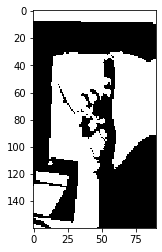

In [147]:
test = cv.imread('./gesture_dataset/Gesture_DIY_Dataset_v2/T/Jeremy100.jpg')
test_rgb = cv.cvtColor(test,cv.COLOR_BGR2RGB)
plt.imshow(test_rgb)

test_gray = cv.cvtColor(test,cv.COLOR_BGR2GRAY)
test_gray_rgb = cv.cvtColor(test_gray,cv.COLOR_BGR2RGB)
plt.imshow(test_gray_rgb)

print(type(test_gray_rgb))
print(np.mean(test_gray_rgb))
mean = np.mean(test_gray_rgb)

ret, test_thresh_rgb = cv.threshold(test_gray_rgb,mean,255,cv.THRESH_BINARY)
plt.imshow(test_thresh_rgb)

In [76]:
'./gesture_dataset/Gesture_DIY_Dataset_v1\P'[:-1]

'./gesture_dataset/Gesture_DIY_Dataset_v1\\'

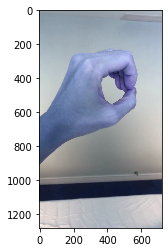

In [79]:
test = cv.imread('./gesture_dataset/Gesture_DIY_Dataset_v1/0/Jeremy13.jpg')
plt.imshow(test)

(1280, 720, 3)
(1920, 1080, 3)
(1280, 720, 3)


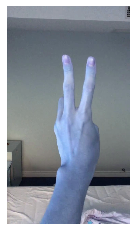

(160, 90, 3)


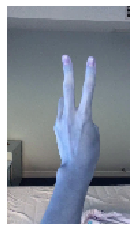

In [45]:
img_path = frame_root_path + '/' + '2/Alan13.jpg'
pic_alan = cv.imread(img_path)
print(pic_alan.shape)

img_path = frame_root_path + '/' + '2/Calvin13.jpg'
pic_calvin = cv.imread(img_path)
print(pic_calvin.shape)

img_path = frame_root_path + '/' + '2/Jeremy13.jpg'
pic_jeremy = cv.imread(img_path)
print(pic_jeremy.shape)

plt.imshow(pic_jeremy) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

resize_height = 160
resize_width = 90
pic_resize = cv.resize(pic_jeremy, (resize_width, resize_height), interpolation=cv.INTER_CUBIC)
print(pic_resize.shape)

plt.imshow(pic_resize) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
# cv.imshow('', pic)

In [28]:
#视频路径
abs_path = "D:\\UCB_ML\\gesture_dataset\\Gesture_DIY_Video\\A.mp4"
# 读取视频文件
videoCapture = cv2.VideoCapture("2.mp4")

In [30]:
#读帧
success, frame = videoCapture.read()
frame_rgb = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
# print(type(frame))
# plt.imshow(frame_rgb) # 显示图片
# plt.axis('off') # 不显示坐标轴
# plt.show()

#保存帧到文件夹
label = os.path.basename(abs_path).split('.')[0]

i = 0
while success:
    i = i + 1
    save_image(frame,'./gesture_dataset/Gesture_DIY_Dataset/' + label + '/',i)
#     if success:
#         print('save image:',i)
    success, frame = videoCapture.read()

In [37]:
if not os.path.exists('./gesture_dataset/Gesture_DIY_Dataset/B'):
    os.mkdir('./gesture_dataset/Gesture_DIY_Dataset/B')
# !md D:\UCB_ML\gesture_dataset\Gesture_DIY_Dataset\B

In [15]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

420 ms ± 7.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%%time
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

Wall time: 487 ms


In [46]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [47]:
%prun sum_of_lists(1000000)

In [48]:
print(sum_of_lists(1000000))

2038036892544


In [55]:
%xmode context

Exception reporting mode: Context


In [2]:
def func1(a,b):
    return a/b

In [59]:
print(func1(5,0))

ZeroDivisionError: division by zero

In [60]:
%debug

> <ipython-input-58-af923f9209db>(2)func1()
      1 def func1(a,b):
----> 2     return a/b

ipdb> print(a)
5
ipdb> print()b
*** SyntaxError: invalid syntax
ipdb> print(b)
0
ipdb> quit


In [61]:
%debug

> <ipython-input-58-af923f9209db>(2)func1()
      1 def func1(a,b):
----> 2     return a/b

ipdb> up
> <ipython-input-59-6daaa70c9569>(1)<module>()
----> 1 print(func1(5,0))

ipdb> down
> <ipython-input-58-af923f9209db>(2)func1()
      1 def func1(a,b):
----> 2     return a/b

ipdb> up
> <ipython-input-59-6daaa70c9569>(1)<module>()
----> 1 print(func1(5,0))

ipdb> down
> <ipython-input-58-af923f9209db>(2)func1()
      1 def func1(a,b):
----> 2     return a/b

ipdb> quit


In [5]:
%xmode Plain
%pdb on

Exception reporting mode: Plain
Automatic pdb calling has been turned ON


In [10]:
print(func1(3,0))

ZeroDivisionError: division by zero

> <ipython-input-2-af923f9209db>(2)func1()
      1 def func1(a,b):
----> 2     return a/b

ipdb> p
*** SyntaxError: unexpected EOF while parsing
ipdb> p(a)
3
ipdb> list
      1 def func1(a,b):
----> 2     return a/b

ipdb> 

ipdb> p(a)
3
ipdb> 
3
ipdb> q


UsageError: Line magic function `%list` not found.
